<a href="https://colab.research.google.com/github/nashita29062003/nashita/blob/main/PolynnomialRegression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


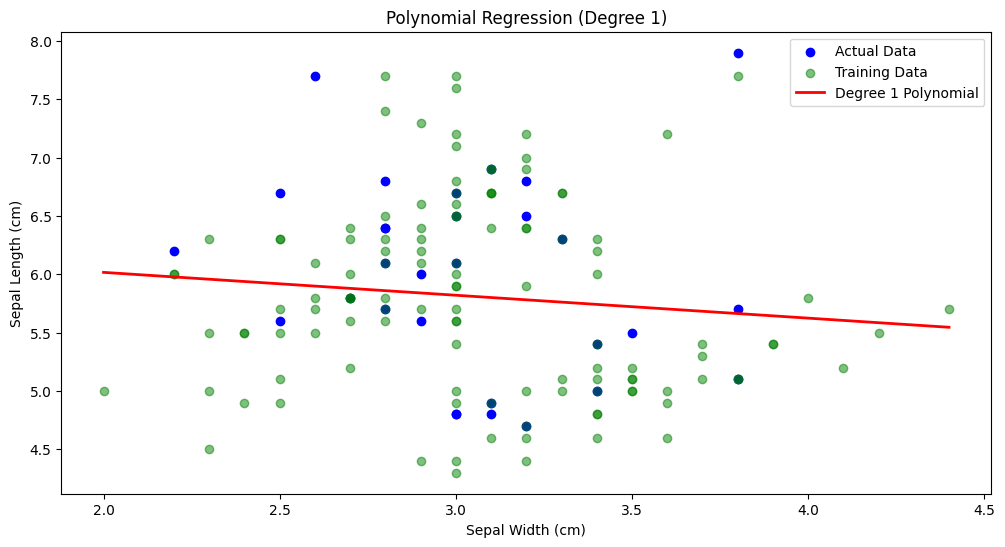

Degree 1 Polynomial
Training Error: 0.6653047537876158
Testing Error: 0.7035672420306047



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


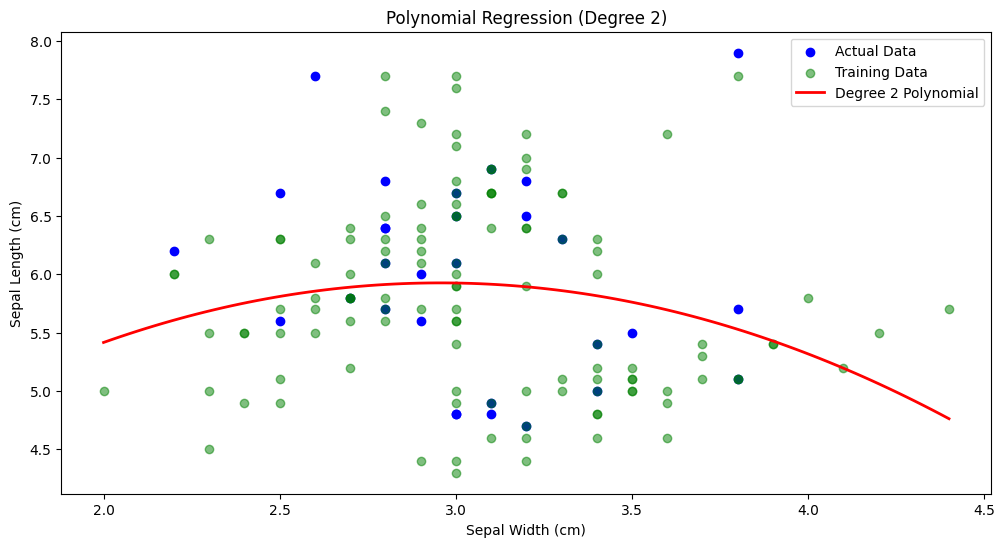

Degree 2 Polynomial
Training Error: 0.6396801849006841
Testing Error: 0.7444544050027501



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


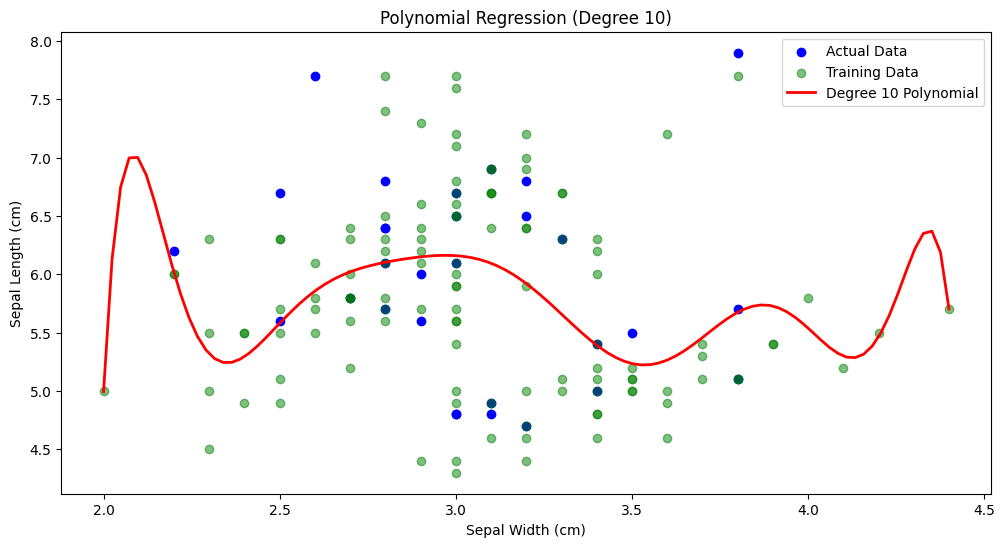

Degree 10 Polynomial
Training Error: 0.5576603217729563
Testing Error: 0.742021814439795



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# For simplicity, we'll use only sepal length and sepal width
X = iris_df[['sepal width (cm)']]
y = iris_df['sepal length (cm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot polynomial regression results
def plot_polynomial_regression(degree):
    # Transform the data to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Scatter plot for training and testing data
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.scatter(X_train, y_train, color='green', label='Training Data', alpha=0.5)

    # Plotting the regression curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range = model.predict(X_range_poly)
    plt.plot(X_range, y_range, color='red', linewidth=2, label=f'Degree {degree} Polynomial')

    # Add labels and title
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Sepal Length (cm)')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

    print(f"Degree {degree} Polynomial")
    print(f"Training Error: {train_error}")
    print(f"Testing Error: {test_error}\n")

# Plot polynomial regression for different degrees
for degree in [1, 2, 10]:
    plot_polynomial_regression(degree)